In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

import warnings

In [ ]:
!pip install tensorflow

In [72]:
import tensorflow as tf

In [11]:
tensorflow.version.VERSION

import sys
print(sys.version)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]


In [12]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


3
(60000, 28, 28)
uint8


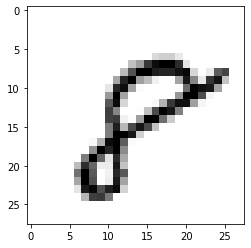

In [23]:
print(train_images.ndim)
print(train_images.shape) # 데이터수, 행, 열
print(train_images.dtype)

digit = train_images[59999]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [26]:
# 자세한 표기법
my_slice = train_images[10:100, :, :]
my_slice.shape

my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

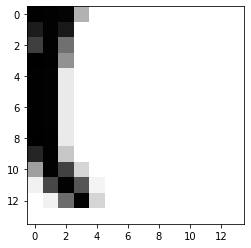

In [52]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

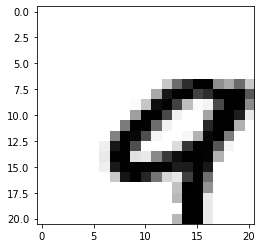

In [55]:
my_slice = train_images[:, :-7, :-7]
plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

In [59]:
batch1 = train_images[:128]
batch2 = train_images[128:256]

# n번째 batch
n = 3
batch3 = train_images[128 * n : 128 * (n+1)]

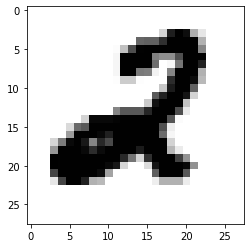

In [63]:
plt.imshow(batch3[1], cmap=plt.cm.binary)
plt.show()

In [71]:
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense

tf_boston = Sequential()
tf_boston.add(Dense(1, input_dim=13, activation='linear'))
tf_boston.count_params()

14

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
boston_housing.load_data()

train_data.shape  # 404개의 훈련 샘플
test_data.shape   # 102개의 테스트 샘플
train_targets        # 주택 가격 (1만 달러 ~ 5만 달러 사이)

#데이터 정규화 (평균 0, 표준편차 1
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

57026/57026 [==============================] - 0s 0us/step


In [80]:
df = pd.DataFrame(train_data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                                       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                                       'PTRATIO', 'B', "RSTAT"])

df['MEDV'] = train_targets

# Model complie
tf_boston.compile(loss='mse')

# Model fit
tf_boston.fit(train_data, train_targets, epochs=50, batch_size=1, 
              verbose=2, validation_split=0.2)

# Model 평가
tf_boston.evaluate(test_data, test_targets)


Epoch 1/50
323/323 - 1s - loss: 31.4836 - val_loss: 42.4371 - 579ms/epoch - 2ms/step
Epoch 2/50
323/323 - 0s - loss: 31.2887 - val_loss: 41.9172 - 287ms/epoch - 890us/step
Epoch 3/50
323/323 - 0s - loss: 31.0366 - val_loss: 41.3571 - 368ms/epoch - 1ms/step
Epoch 4/50
323/323 - 0s - loss: 30.7944 - val_loss: 40.8322 - 328ms/epoch - 1ms/step
Epoch 5/50
323/323 - 0s - loss: 30.5446 - val_loss: 40.3597 - 248ms/epoch - 769us/step
Epoch 6/50
323/323 - 0s - loss: 30.2961 - val_loss: 39.9696 - 264ms/epoch - 817us/step
Epoch 7/50
323/323 - 0s - loss: 30.1276 - val_loss: 39.6246 - 300ms/epoch - 928us/step
Epoch 8/50
323/323 - 0s - loss: 29.9233 - val_loss: 39.2768 - 274ms/epoch - 848us/step
Epoch 9/50
323/323 - 0s - loss: 29.7416 - val_loss: 38.8609 - 259ms/epoch - 801us/step
Epoch 10/50
323/323 - 0s - loss: 29.5121 - val_loss: 38.3682 - 261ms/epoch - 808us/step
Epoch 11/50
323/323 - 0s - loss: 29.3371 - val_loss: 38.0110 - 262ms/epoch - 812us/step
Epoch 12/50
323/323 - 0s - loss: 29.1203 - val_

18.500625610351562

In [77]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,RSTAT,MEDV
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220,15.2
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202,42.3
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500,50.0
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926,21.1
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.381973,-0.483615,-0.616568,-0.256833,-0.933487,-0.938177,-0.251223,1.157680,-0.741356,-1.040501,-0.262093,0.448077,0.477421,19.4
400,-0.388221,0.358906,-0.609218,-0.256833,-0.796907,-0.038202,-1.888860,0.339660,-0.741356,-1.100681,0.056428,0.448077,-0.848908,25.2
401,-0.402030,0.990797,-0.741515,-0.256833,-1.019702,-0.333021,-1.638018,1.430403,-0.971569,-0.613224,-0.717123,0.079439,-0.677769,19.4
402,-0.172920,-0.483615,1.245881,-0.256833,2.677335,-0.787241,1.056737,-1.044075,-0.511142,-0.017443,-1.718189,-0.987644,0.420835,19.4
